In [ ]:
!pip install quandl

In [ ]:
import pandas as pd
import quandl
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:

import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
QUANDL_KEY = 'WrWh4k_6h13txBHprnGU' # replace {key} with your own API key  
quandl.ApiConfig.api_key = QUANDL_KEY

df = quandl.get(dataset='WGC/GOLD_MONAVG_USD',
                start_date='2000-01-01', 
                end_date='2011-12-31')

df.rename(columns={'Value': 'price'}, inplace=True)
df.head()
# df = df.resample('M').last()

NameError: ignored

In [ ]:
WINDOW_SIZE = 12
df['rolling_mean'] = df.price.rolling(window=WINDOW_SIZE).mean()
df['rolling_std'] = df.price.rolling(window=WINDOW_SIZE).std()
df.plot(title='Gold Price')

plt.tight_layout()
#plt.savefig('images/ch3_im1.png')
plt.show()

AttributeError: ignored

In [ ]:
from fbprophet import Prophet
import seabron as sns
import quandlimport pandas as pd


SyntaxError: ignored

In [ ]:
df = quandl.get(dataset='WGC/GOLD_DAILY_USD',
                start_date='2000-01-01',
                end_date='2005-12-31')

df.reset_index(drop=False, inplace=True)
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

In [ ]:
df['Value']

Date
2000-01-31    284.31
2000-02-29    299.86
2000-03-31    286.39
2000-04-28    279.69
2000-04-30    279.69
               ...  
2005-09-30    456.05
2005-10-31    469.90
2005-11-30    476.67
2005-12-30    510.10
2005-12-31    510.10
Name: Value, Length: 92, dtype: float64

In [ ]:
df.loc['2000-01-31']

Value    284.31
Name: 2000-01-31 00:00:00, dtype: float64

In [ ]:
df.reset_index(drop=False,inplace=True)

In [ ]:
df['Date']

0    2000-01-31
1    2000-02-29
2    2000-03-31
3    2000-04-28
4    2000-04-30
        ...    
87   2005-09-30
88   2005-10-31
89   2005-11-30
90   2005-12-30
91   2005-12-31
Name: Date, Length: 92, dtype: datetime64[ns]

In [ ]:
df.rename(columns={'Date': 'ds', 'Value': 'y'}, inplace=True)

In [ ]:
df.head()

,ds,y
0,2000-01-31,284.31
1,2000-02-29,299.86
2,2000-03-31,286.39
3,2000-04-28,279.69
4,2000-04-30,279.69


In [ ]:
train_indices = df.ds.apply(lambda x: x.year).values < 2005
train_indices.shape


(1565,)

In [ ]:
df.loc[train_indices]

,ds,y
0,2000-01-31,284.31
1,2000-02-29,299.86
2,2000-03-31,286.39
3,2000-04-28,279.69
4,2000-04-30,279.69
...,...,...
72,2004-09-30,405.27
73,2004-10-29,420.46
74,2004-10-31,420.46
75,2004-11-30,439.37


In [ ]:
df_train = df.loc[train_indices].dropna()
df_test = df.loc[~train_indices].reset_index(drop=True)

In [ ]:
df_train

,ds,y
0,2000-01-31,284.31
1,2000-02-29,299.86
2,2000-03-31,286.39
3,2000-04-28,279.69
4,2000-04-30,279.69
...,...,...
72,2004-09-30,405.27
73,2004-10-29,420.46
74,2004-10-31,420.46
75,2004-11-30,439.37


In [ ]:
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_prophet.fit(df_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
df_future = model_prophet.make_future_dataframe(periods=365)


In [ ]:
df_future

,ds
0,2000-01-03
1,2000-01-04
2,2000-01-05
3,2000-01-06
4,2000-01-07
...,...
1665,2005-12-27
1666,2005-12-28
1667,2005-12-29
1668,2005-12-30


In [ ]:
df_pred = model_prophet.predict(df_future)

In [ ]:
df_pred

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-03,274.769217,279.744000,298.365307,274.769217,274.769217,14.639769,14.639769,14.639769,0.230581,0.230581,0.230581,-2.625401,-2.625401,-2.625401,17.034589,17.034589,17.034589,0.0,0.0,0.0,289.408987
1,2000-01-04,274.907011,279.949671,298.732600,274.907011,274.907011,14.567839,14.567839,14.567839,0.248557,0.248557,0.248557,-2.742696,-2.742696,-2.742696,17.061978,17.061978,17.061978,0.0,0.0,0.0,289.474851
2,2000-01-05,275.044805,278.757054,297.747057,275.044805,275.044805,13.782033,13.782033,13.782033,-0.223783,-0.223783,-0.223783,-3.057720,-3.057720,-3.057720,17.063537,17.063537,17.063537,0.0,0.0,0.0,288.826839
3,2000-01-06,275.182599,279.336881,298.150020,275.182599,275.182599,13.239849,13.239849,13.239849,-0.695163,-0.695163,-0.695163,-3.105568,-3.105568,-3.105568,17.040579,17.040579,17.040579,0.0,0.0,0.0,288.422448
4,2000-01-07,275.320393,279.772320,298.502500,275.320393,275.320393,13.514682,13.514682,13.514682,-0.734474,-0.734474,-0.734474,-2.745842,-2.745842,-2.745842,16.994998,16.994998,16.994998,0.0,0.0,0.0,288.835076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,2005-12-27,468.533740,385.406055,573.704635,371.537310,560.047509,13.841305,13.841305,13.841305,0.356733,0.356733,0.356733,-2.742696,-2.742696,-2.742696,16.227267,16.227267,16.227267,0.0,0.0,0.0,482.375045
1666,2005-12-28,468.636646,383.279071,575.643006,371.201135,560.437697,13.251559,13.251559,13.251559,-0.107545,-0.107545,-0.107545,-3.057720,-3.057720,-3.057720,16.416824,16.416824,16.416824,0.0,0.0,0.0,481.888206
1667,2005-12-29,468.739553,385.190655,574.817489,370.864959,560.944192,13.323829,13.323829,13.323829,-0.155553,-0.155553,-0.155553,-3.105568,-3.105568,-3.105568,16.584951,16.584951,16.584951,0.0,0.0,0.0,482.063382
1668,2005-12-30,468.842459,382.163550,574.506645,370.528784,561.450687,14.264649,14.264649,14.264649,0.280744,0.280744,0.280744,-2.745842,-2.745842,-2.745842,16.729746,16.729746,16.729746,0.0,0.0,0.0,483.107108


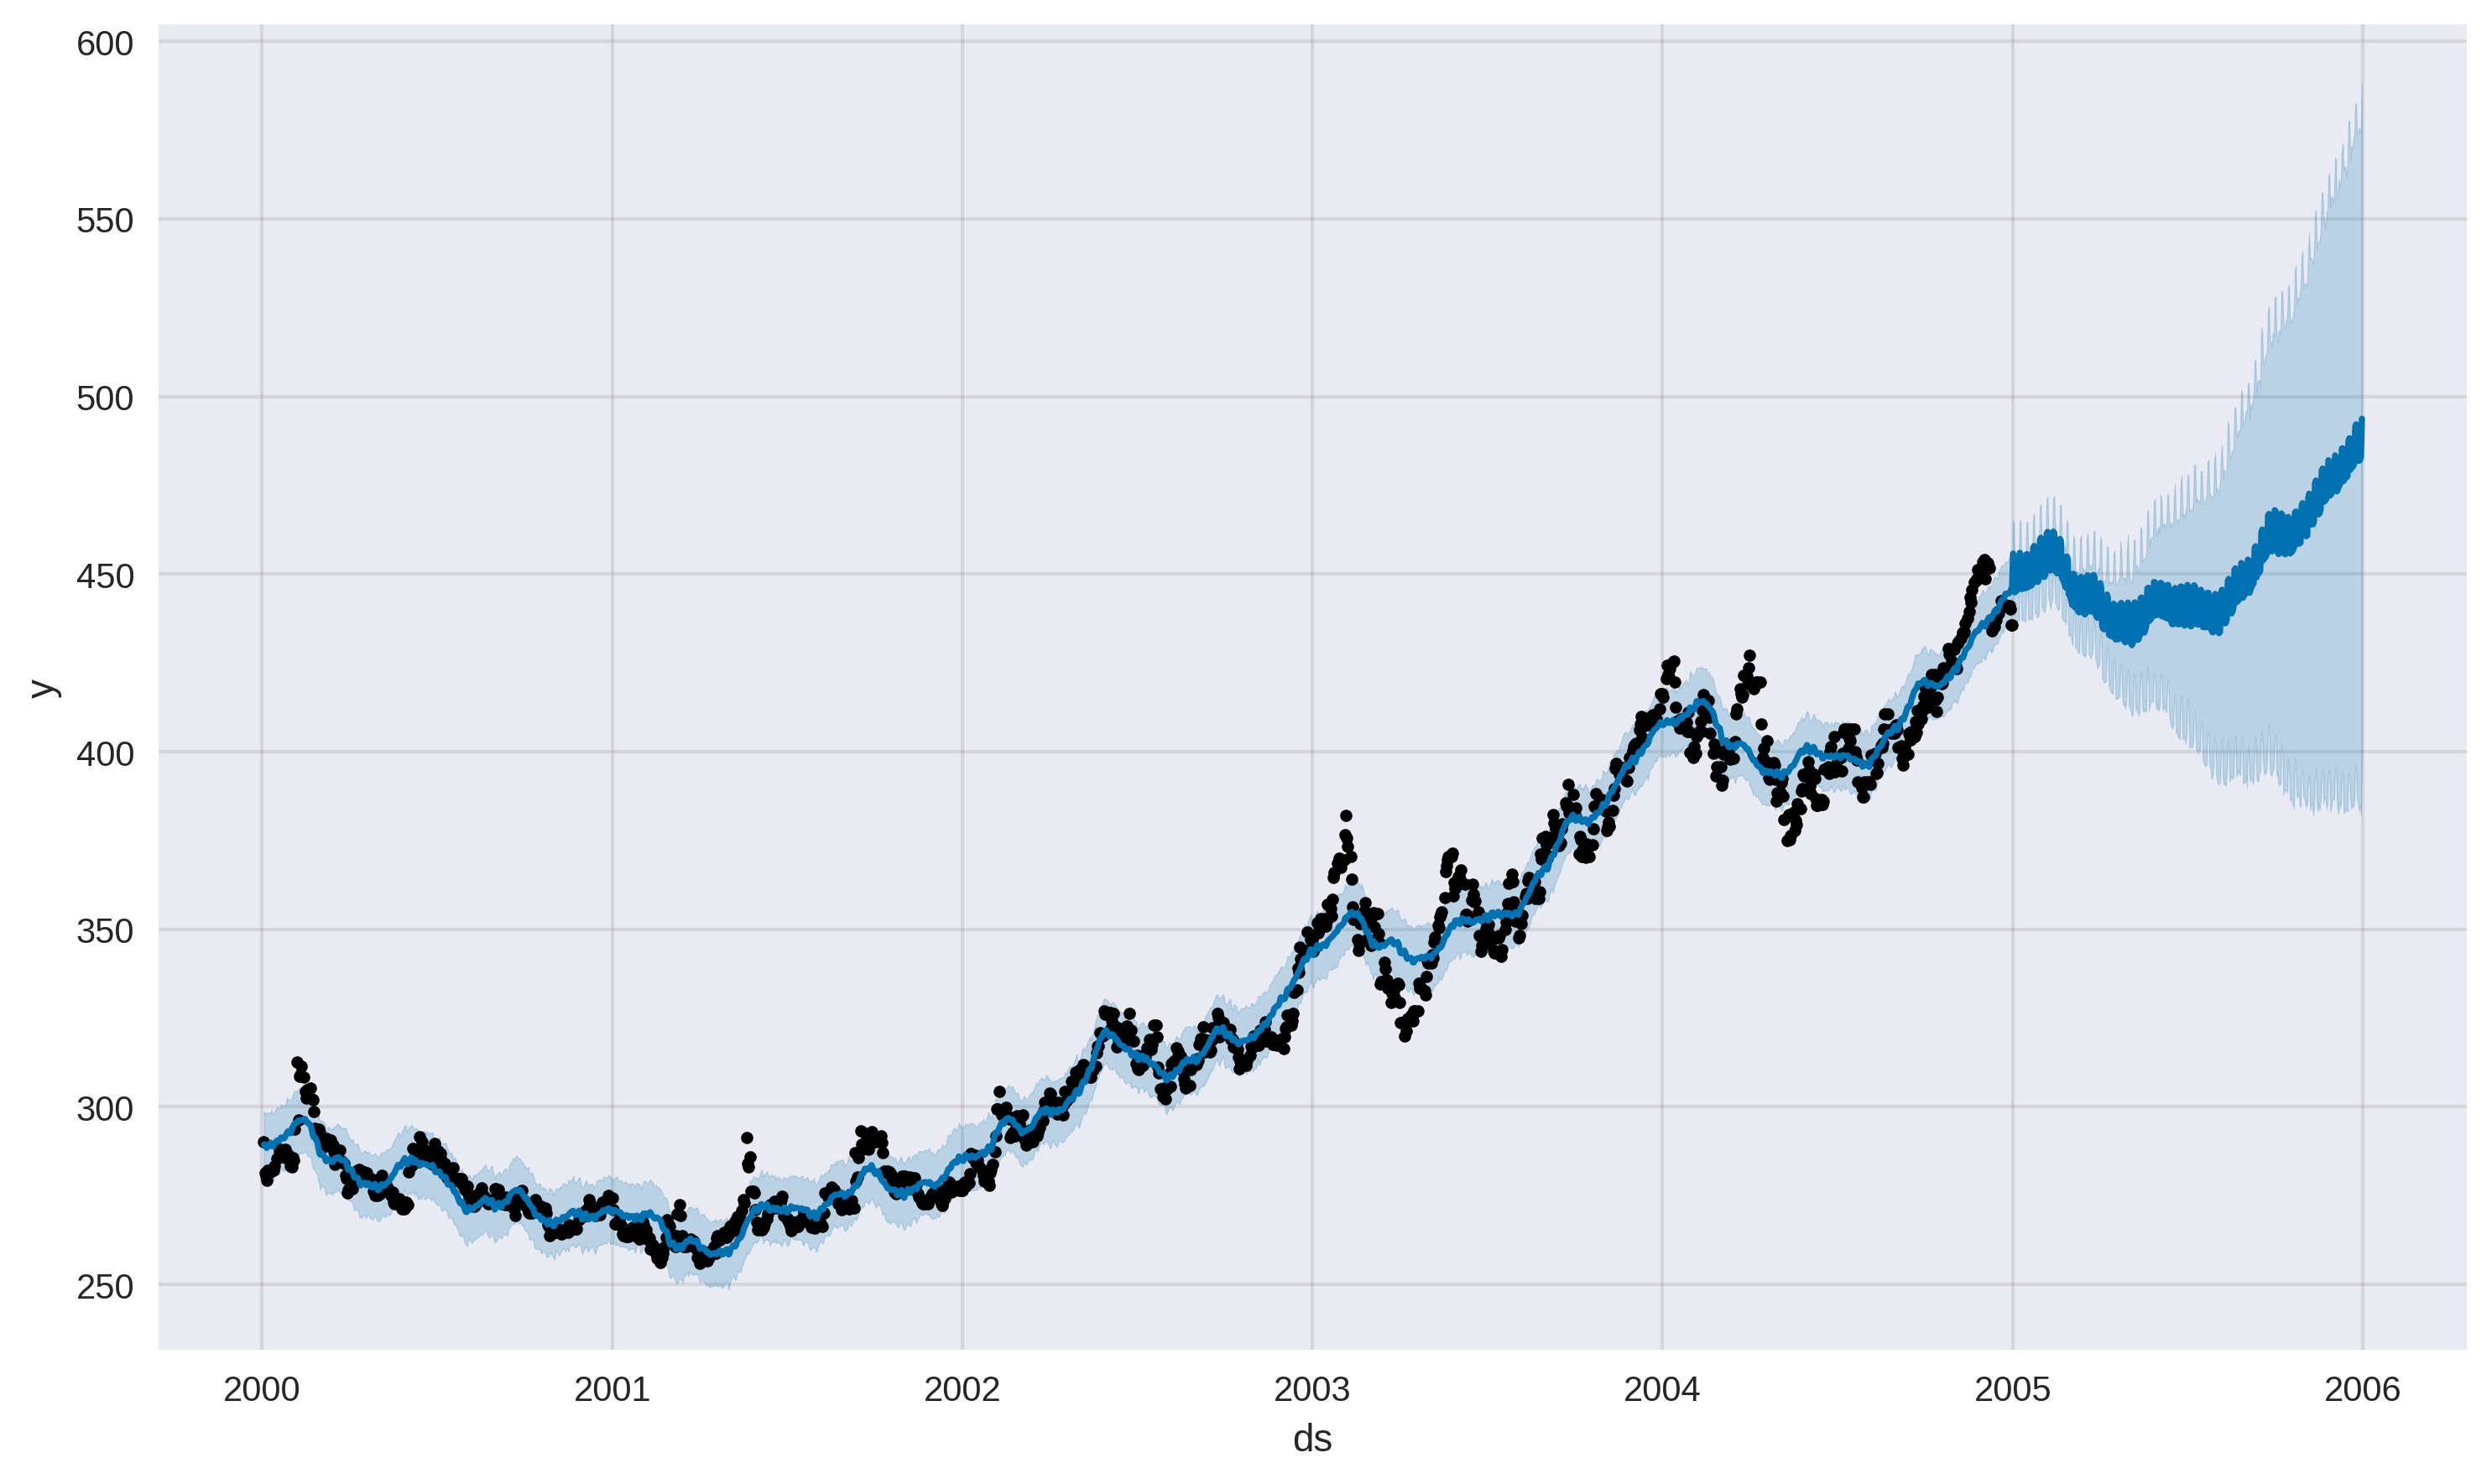

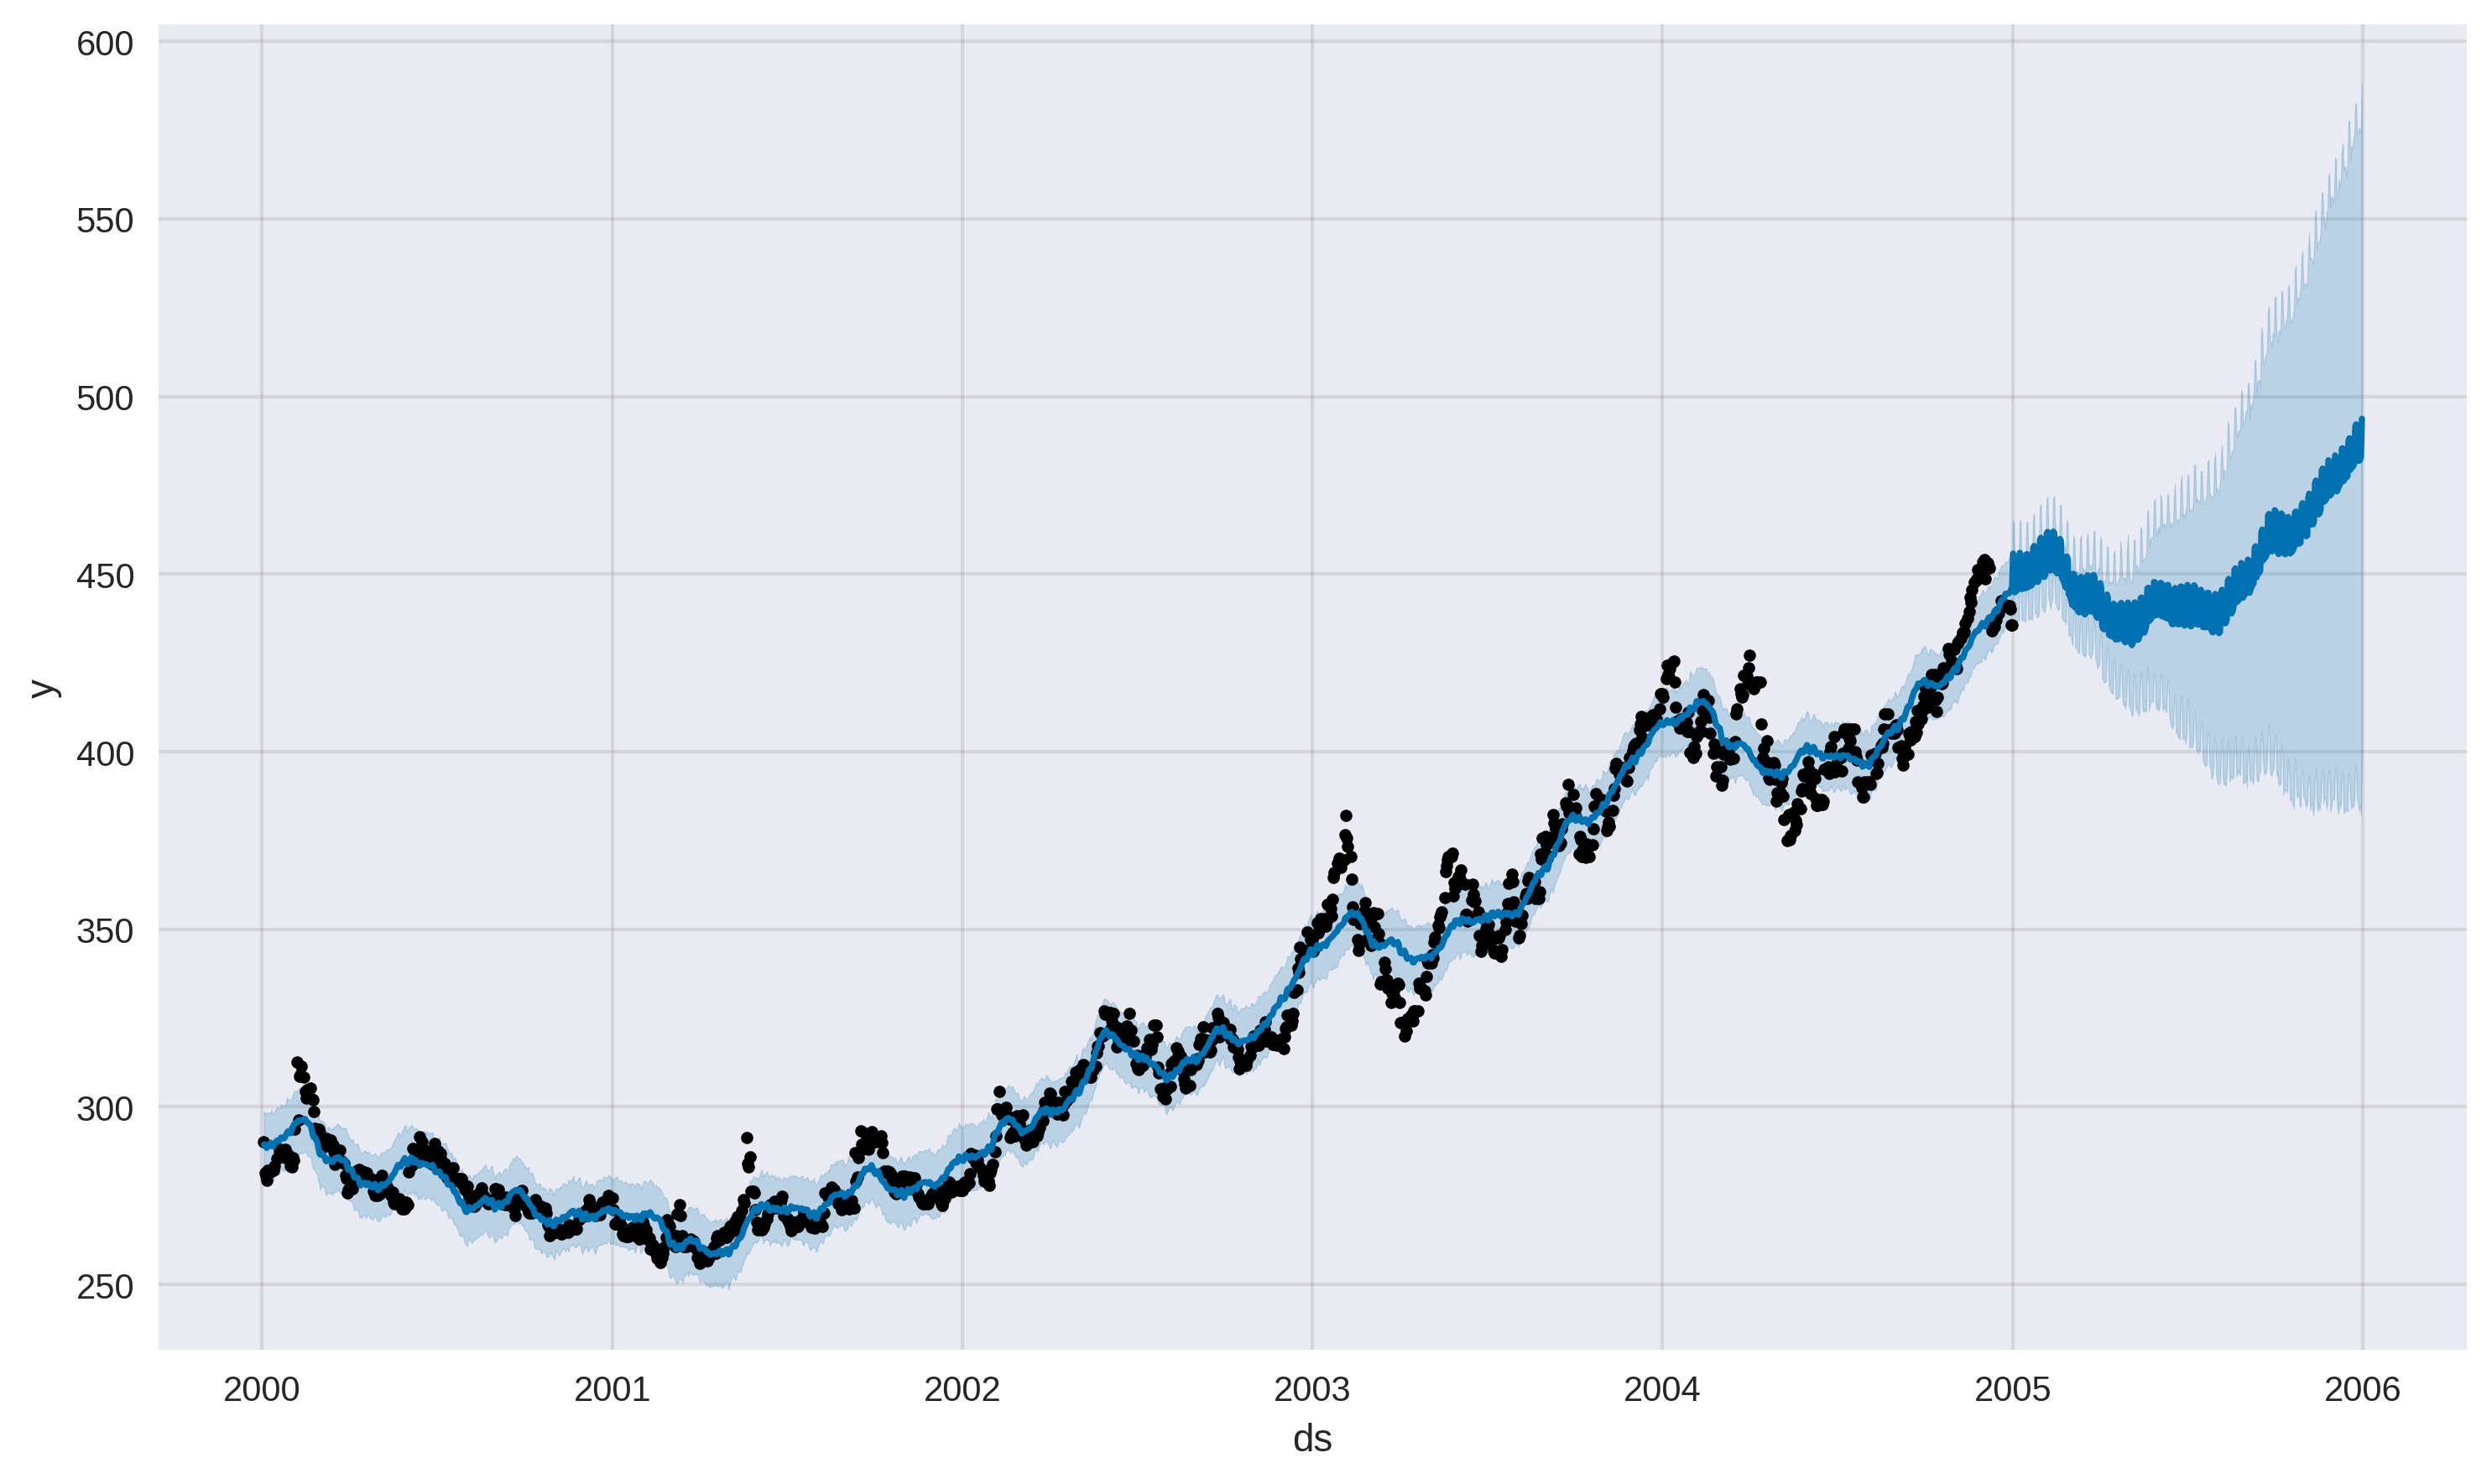

In [ ]:
model_prophet.plot(df_pred)

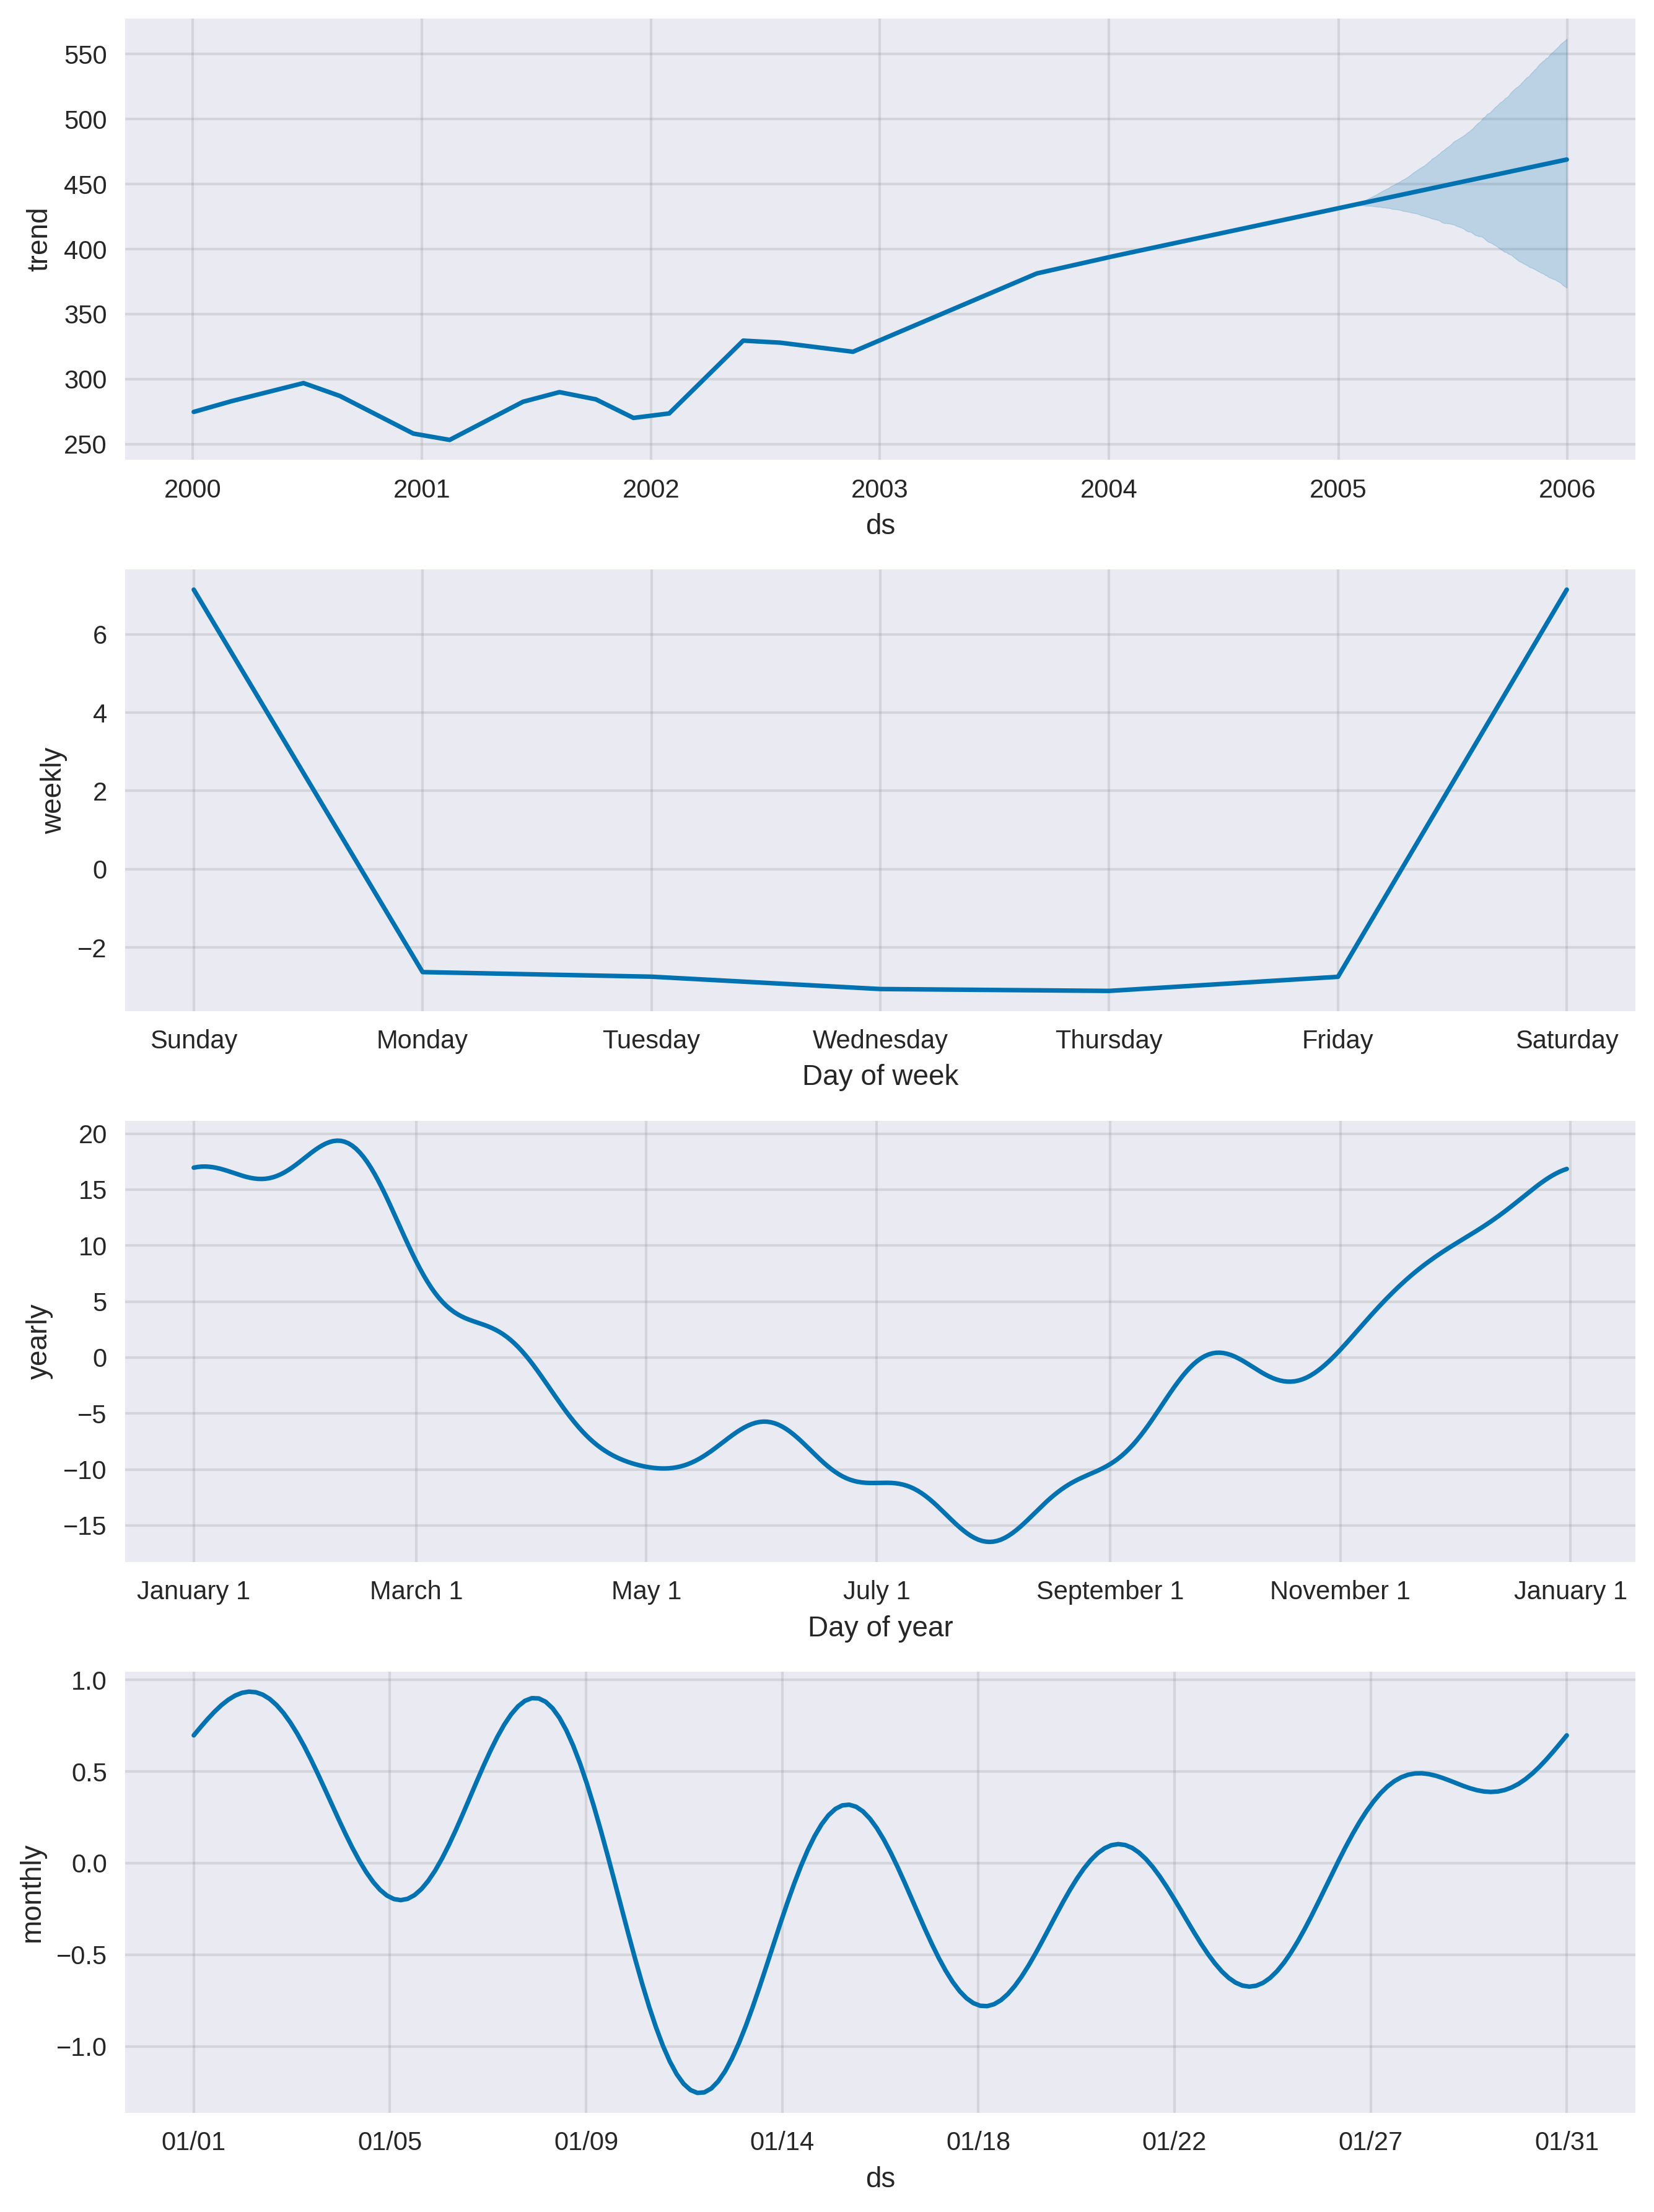

In [ ]:

model_prophet.plot_components(df_pred)

plt.tight_layout()
#plt.savefig('images/ch3_im4.png')
plt.show()